In [1]:
import os
import re
import cv2
import numpy as np
from tqdm.auto import tqdm
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
col_frames = os.listdir('frames/')
col_frames.sort(key=lambda f: int(re.sub('\D','',f))) #根据数字来排序

col_images = []
for i in tqdm_notebook(col_frames):
    img = cv2.imread('frames/'+i)
    col_images.append(img)

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Henry Liu\AppData\Local\Temp\ipykernel_12668\370754745.py:2: SyntaxWarning: invalid escape sequence '\D'
  col_frames.sort(key=lambda f: int(re.sub('\D','',f))) #根据数字来排序
C:\Users\Henry Liu\AppData\Local\Temp\ipykernel_12668\370754745.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(col_frames):


  0%|          | 0/1108 [00:00<?, ?it/s]

In [77]:
col_images[2].shape

(270, 480, 3)

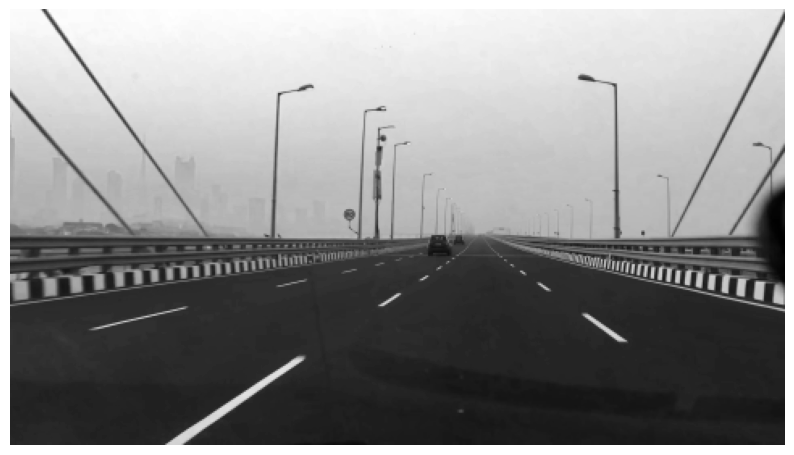

In [49]:
idx = 457

plt.figure(figsize=(10,10))
plt.imshow(col_images[idx][:,:,0],cmap='gray')
plt.axis('off');
plt.show()

In [43]:
stencil = np.zeros_like(col_images[idx][:,:,0])
polygon = np.array([[50,270],[220,160],[360,160],[480,270]])
cv2.fillConvexPoly(stencil,polygon,1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

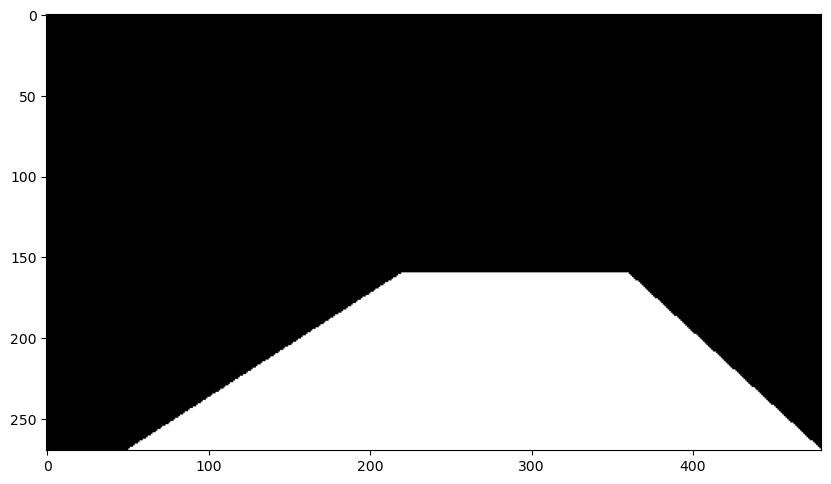

In [44]:
plt.figure(figsize=(10,10))
plt.imshow(stencil,cmap='gray')
plt.show()

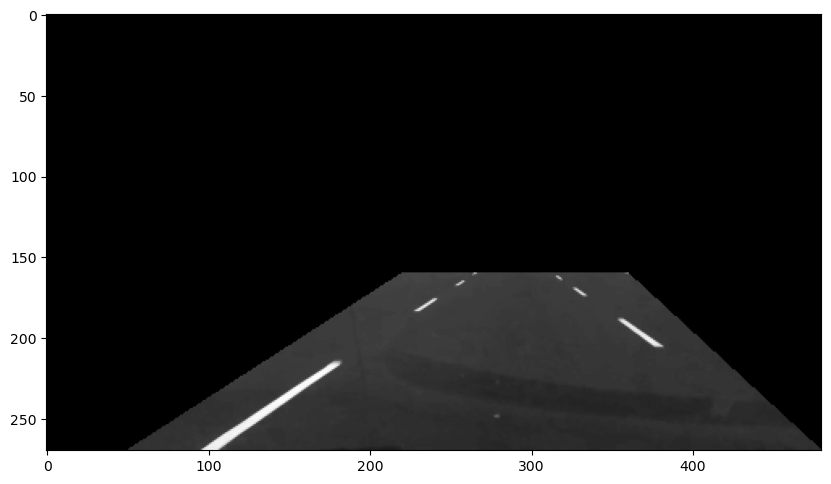

In [47]:
img = cv2.bitwise_and(col_images[idx][:,:,0],col_images[idx][:,:,0],mask=stencil)
plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.show()

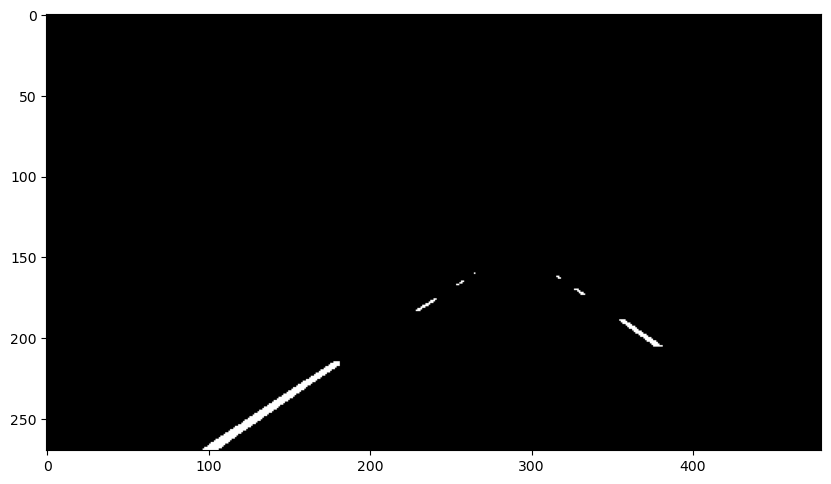

In [61]:
ret , thresh = cv2.threshold(img,130,145,cv2.THRESH_BINARY)

plt.figure(figsize=(10,10))
plt.imshow(thresh,cmap='gray')
plt.show()

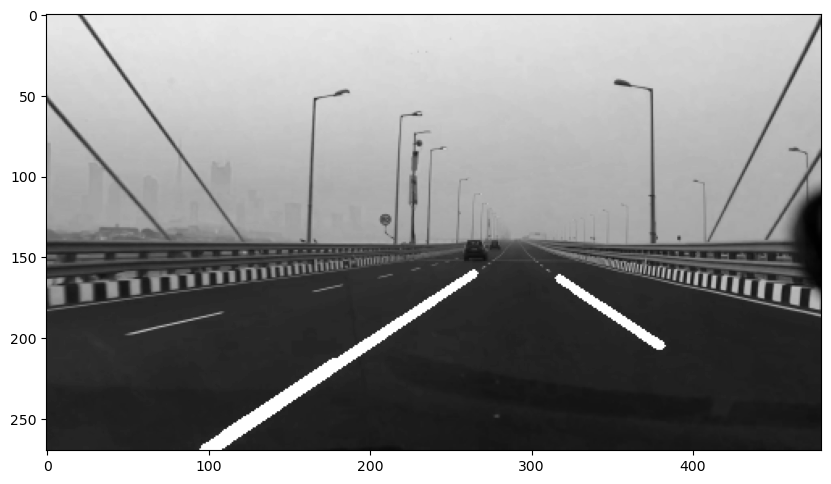

In [71]:
# Hough Line Transformation

lines = cv2.HoughLinesP(thresh,1,np.pi/180,30,maxLineGap=200)
dmy = col_images[idx][:,:,0].copy()
for line in lines:
    x1,y1,x2,y2=line[0]
    cv2.line(dmy,(x1,y1),(x2,y2),(255,0,0),3)

plt.figure(figsize=(10,10))
plt.imshow(dmy,cmap='gray')
plt.show()

In [64]:
lines[0]

array([[104, 269, 265, 160]], dtype=int32)

In [73]:
cnt = 0

for img in tqdm_notebook(col_images):
    masked = cv2.bitwise_and(img[:,:,0],img[:,:,0],mask=stencil)
    ret,thresh = cv2.threshold(masked,130,145,cv2.THRESH_BINARY)
    lines = cv2.HoughLinesP(thresh,1,np.pi/180,30,maxLineGap=200)
    dmy = img.copy()
    try:
        for line in lines:
            x1,y1,x2,y2 = line[0]
            cv2.line(dmy,(x1,y1),(x2,y2),(255,0,0),3)
        
        cv2.imwrite('detected/' + str(cnt) +'.png',dmy)
    except TypeError:
        cv2.imwrite('detected/'+str(cnt)+'.png',img)
    cnt += 1


C:\Users\Henry Liu\AppData\Local\Temp\ipykernel_12668\363504650.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img in tqdm_notebook(col_images):


  0%|          | 0/1108 [00:00<?, ?it/s]

In [74]:
pathIn = 'detected/'
pathOut = 'roads_v2.mp4'
fps = 30.0

from os.path import isfile,join
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn,f))]
files.sort(key=lambda f:int(re.sub('\D','',f)))

<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Henry Liu\AppData\Local\Temp\ipykernel_12668\883483017.py:7: SyntaxWarning: invalid escape sequence '\D'
  files.sort(key=lambda f:int(re.sub('\D','',f)))


In [78]:
frame_list = []
for i in tqdm_notebook(range(len(files))):
    filename = pathIn + files[i]
    img = cv2.imread(filename=filename)
    height,width,layers = img.shape  #注意shape是宽，长，颜色通道数
    size = (width,height)
    frame_list.append(img)


C:\Users\Henry Liu\AppData\Local\Temp\ipykernel_12668\2261265182.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(files))):


  0%|          | 0/1108 [00:00<?, ?it/s]

In [79]:
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'),fps,size)
for i in range(len(frame_list)):
    out.write(frame_list[i])
out.release()